In [75]:
%matplotlib inline

from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [76]:
df = pd.read_table("/home/vdn/shared-with-me/pdbsim/loops.txt.gz", sep="\t")

In [77]:
df.shape

(26021320, 18)

In [78]:
df["tcr_key"] = df["pdb_id"]
df["kmer_key"] = df["pdb_id_kmer"] + "." + df["chain_id_kmer"] + "." + df["start_kmer"].apply(str)

In [79]:
df.head(20)

,pdb_id,tcr_v_allele,tcr_region,aa_tcr,len_tcr,pos_tcr,x,y,z,aa_kmer,chain_id_kmer,pdb_id_kmer,start_kmer,x_kmer,y_kmer,z_kmer,delta,rmsd,tcr_key,kmer_key
0,2ypl,TRBV19*01,CDR3,C,11,0,0.000000,0.000000e+00,0.000000e+00,S,A,3dt2,547,0.000000,0.000000e+00,0.000000e+00,0.000000,1.419201,2ypl,3dt2.A.547
1,2ypl,TRBV19*01,CDR3,A,11,1,2.534935,1.477557e-01,2.856983e+00,A,A,3dt2,547,2.351222,-1.299914e-01,2.994797e+00,0.129886,1.419201,2ypl,3dt2.A.547
2,2ypl,TRBV19*01,CDR3,S,11,2,3.679389,-1.682321e+00,6.002911e+00,K,A,3dt2,547,4.178434,-2.766051e+00,5.003392e+00,2.422553,1.419201,2ypl,3dt2.A.547
3,2ypl,TRBV19*01,CDR3,T,11,3,5.996446,-1.094339e+00,8.976842e+00,L,A,3dt2,547,5.271529,-2.023841e+00,8.597661e+00,1.533256,1.419201,2ypl,3dt2.A.547
4,2ypl,TRBV19*01,CDR3,G,11,4,8.505212,-3.344016e+00,1.073696e+01,T,A,3dt2,547,9.004950,-2.272426e+00,9.373747e+00,3.256380,1.419201,2ypl,3dt2.A.547
5,2ypl,TRBV19*01,CDR3,S,11,5,11.446544,-1.280467e+00,1.201981e+01,P,A,3dt2,547,11.043735,-1.049604e+00,1.234834e+01,0.323488,1.419201,2ypl,3dt2.A.547
6,2ypl,TRBV19*01,CDR3,Y,11,6,12.154551,2.376822e+00,1.110362e+01,I,A,3dt2,547,11.892047,2.241682e+00,1.062781e+01,0.313567,1.419201,2ypl,3dt2.A.547
7,2ypl,TRBV19*01,CDR3,G,11,7,10.320304,3.620028e+00,8.036668e+00,G,A,3dt2,547,8.359068,3.037677e+00,9.476304e+00,6.258132,1.419201,2ypl,3dt2.A.547
8,2ypl,TRBV19*01,CDR3,Y,11,8,7.939389,2.054790e+00,5.550347e+00,Y,A,3dt2,547,6.100795,1.980212e+00,6.627371e+00,4.545974,1.419201,2ypl,3dt2.A.547
9,2ypl,TRBV19*01,CDR3,T,11,9,7.993178,-7.982514e-01,3.068269e+00,V,A,3dt2,547,7.605080,9.823408e-01,3.288212e+00,3.369503,1.419201,2ypl,3dt2.A.547


In [80]:
tmp = Counter(df["len_tcr"])
print([tmp[x] / int(x) for x in tmp])
tmp

[3082.0, 7395.0, 1173110.0, 686916.0, 336957.0, 15445.0, 10279.0]


Counter({10: 73950,
         11: 12904210,
         12: 8242992,
         13: 4380441,
         14: 216230,
         15: 154185,
         16: 49312})

/home/vdn/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


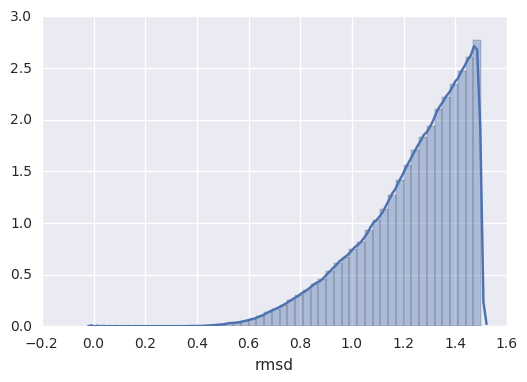

In [81]:
sns.distplot(df["rmsd"])

In [82]:
df_cdr = df.ix[:, ["tcr_key", "pdb_id", "tcr_v_allele", "tcr_region", "aa_tcr", "len_tcr", "pos_tcr", "x", "y", "z"]]
df_cdr.drop_duplicates(inplace=True)
print(df_cdr.shape)
tmp = Counter(df_cdr["len_tcr"])
print([tmp[x] / int(x) for x in tmp])
df_cdr.head()

(3308, 10)
[32.0, 1.0, 21.0, 32.0, 69.0, 46.0, 42.0]


,tcr_key,pdb_id,tcr_v_allele,tcr_region,aa_tcr,len_tcr,pos_tcr,x,y,z
0,2ypl,2ypl,TRBV19*01,CDR3,C,11,0,0.000000,0.000000,0.000000
1,2ypl,2ypl,TRBV19*01,CDR3,A,11,1,2.534935,0.147756,2.856983
2,2ypl,2ypl,TRBV19*01,CDR3,S,11,2,3.679389,-1.682321,6.002911
3,2ypl,2ypl,TRBV19*01,CDR3,T,11,3,5.996446,-1.094339,8.976842
4,2ypl,2ypl,TRBV19*01,CDR3,G,11,4,8.505212,-3.344016,10.736956


In [83]:
df_putcan = df.ix[:, ["kmer_key", "pos_tcr", "len_tcr", "aa_kmer", "chain_id_kmer", "pdb_id_kmer", "start_kmer", "x_kmer", "y_kmer", "z_kmer", "rmsd"]]
logic = df_putcan.duplicated(subset = ["kmer_key", "pos_tcr", "len_tcr", "aa_kmer", "chain_id_kmer", "pdb_id_kmer", "start_kmer", "x_kmer", "y_kmer", "z_kmer"])
print(df_putcan.shape)
df_putcan = df_putcan.ix[np.invert(np.array(logic)), :]
print(df_putcan.shape) # 5050217
df_putcan.head()

(26021320, 11)
(5050217, 11)


,kmer_key,pos_tcr,len_tcr,aa_kmer,chain_id_kmer,pdb_id_kmer,start_kmer,x_kmer,y_kmer,z_kmer,rmsd
0,3dt2.A.547,0,11,S,A,3dt2,547,0.000000,0.000000,0.000000,1.419201
1,3dt2.A.547,1,11,A,A,3dt2,547,2.351222,-0.129991,2.994797,1.419201
2,3dt2.A.547,2,11,K,A,3dt2,547,4.178434,-2.766051,5.003392,1.419201
3,3dt2.A.547,3,11,L,A,3dt2,547,5.271529,-2.023841,8.597661,1.419201
4,3dt2.A.547,4,11,T,A,3dt2,547,9.004950,-2.272426,9.373747,1.419201


In [84]:
df_put = pd.DataFrame()
df_can = pd.DataFrame()
for LEN in range(10,17):
    sub_df = df_putcan.ix[df_putcan["len_tcr"] == LEN, :]
    tmp = sub_df["aa_kmer"]
    tmp = np.array(list(map(lambda x: "".join(x), tmp.reshape((-1, LEN)))))
    logic = np.array(list(map(lambda x: (x[0] == "C") and ((x[-1] == "F") or (x[-1] == "W")), tmp)))
    logic_full = np.array([[x] * LEN for x in logic]).reshape((-1,))
    df_can = pd.concat([df_can, sub_df.ix[logic_full,:]])
    df_put = pd.concat([df_put, sub_df.ix[np.invert(logic_full),:]])
print(df_put.shape[0])
print(df_can.shape[0])
# 5022635

5022635
27582


In [85]:
df_cdr["key"] = df_cdr["tcr_key"]
df_can["key"] = df_can["kmer_key"]
df_put["key"] = df_put["kmer_key"]

df_cdr["aa"] = df_cdr["aa_tcr"]
df_can["aa"] = df_can["aa_kmer"]
df_put["aa"] = df_put["aa_kmer"]

df_can["x"] = df_can["x_kmer"]
df_can["y"] = df_can["y_kmer"]
df_can["z"] = df_can["z_kmer"]
df_put["x"] = df_put["x_kmer"]
df_put["y"] = df_put["y_kmer"]
df_put["z"] = df_put["z_kmer"]

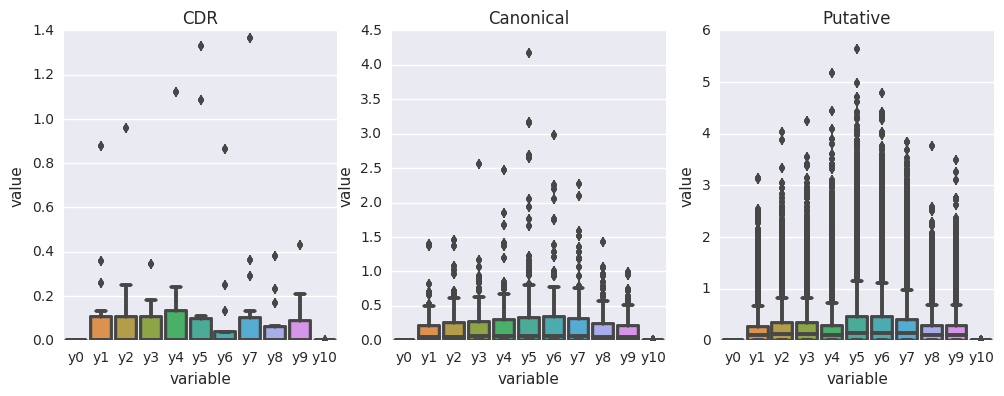

In [91]:
def plot_maxmin(LEN, df_cur, ax, coord="x"):
    tmp = df_cur.ix[df_cur["len_tcr"] == LEN, "aa"]
    tmp2 = list(map(lambda x: "".join(x), tmp.reshape((-1, LEN))))

    tmp3 = df_cur.ix[df_cur["len_tcr"] == LEN, "key"]
    tmp3 = tmp3.reshape((-1, LEN))[:,0]

    tmp4 = df_cur.ix[df_cur["len_tcr"] == LEN, coord]
    tmp4 = tmp4.reshape((-1, LEN))
    tmp5 = pd.DataFrame(np.hstack([pd.DataFrame({"key": tmp3, "seq": tmp2}), pd.DataFrame(tmp4)]))
    tmp5.columns = ["seq", "key"] + list(map(lambda i: coord+str(i), range(LEN)))
    tmp6 = tmp5.groupby("key").aggregate(lambda x: x.max() - x.min())

    tmp6 = pd.melt(pd.DataFrame(tmp6))
    for i in range(LEN):
        sns.boxplot(y="value", x="variable", data=tmp6, ax=ax)
        
fig, ax = plt.subplots(ncols=3)
fig.set_figwidth(12)

coord = "y"
plot_maxmin(11, df_cdr, ax[0], coord)
plot_maxmin(11, df_can, ax[1], coord)
plot_maxmin(11, df_put, ax[2], coord)
ax[0].set_title("CDR")
ax[1].set_title("Canonical")
ax[2].set_title("Putative")

# fig.savefig("plots/maxmin_len11_x.png")
# fig.savefig("plots/maxmin_len11_y.png")

In [211]:
def merge_outliers(df_cur, not_cdr=True):
    def get_df_coord(df, LEN, coord):
        tmp = df_cur.ix[df_cur["len_tcr"] == LEN, "aa"]
        tmp2 = list(map(lambda x: "".join(x), tmp.reshape((-1, LEN))))

        tmp3 = df_cur.ix[df_cur["len_tcr"] == LEN, "key"]
        tmp3 = tmp3.reshape((-1, LEN))[:,0]
    
        if not_cdr:
            tmp4 = df_cur.ix[df_cur["len_tcr"] == LEN, "rmsd"]
            tmp4 = tmp4.reshape((-1, LEN))[:,0]

            tmp5 = df_cur.ix[df_cur["len_tcr"] == LEN, coord]
            tmp5 = tmp5.reshape((-1, LEN))
            tmp6 = pd.DataFrame(np.hstack([pd.DataFrame({"key": tmp3, "seq": tmp2, "rmsd": tmp4}), pd.DataFrame(tmp5)]))
            tmp6.columns = ["key", "rmsd", "seq"] + list(map(lambda i: coord+str(i), range(LEN)))
        
            return tmp6
        
        else:
            tmp5 = df_cur.ix[df_cur["len_tcr"] == LEN, coord]
            tmp5 = tmp5.reshape((-1, LEN))
            tmp6 = pd.DataFrame(np.hstack([pd.DataFrame({"key": tmp3, "seq": tmp2}), pd.DataFrame(tmp5)]))
            tmp6.columns = ["key", "seq"] + list(map(lambda i: coord+str(i), range(LEN)))
            
            return tmp6

    
    out_list = {}
    for LEN in range(10, 17):
        print(LEN)
        df_x = get_df_coord(df_cur, LEN, "x")
        df_y = get_df_coord(df_cur, LEN, "y")
        df_z = get_df_coord(df_cur, LEN, "z")
        
        if not_cdr:
            df_tmp = df_x.groupby("seq").apply(lambda x: x[x["rmsd"] - x["rmsd"].min() < 0.05])
        else:
            df_tmp = df_x
        keys = df_tmp["key"].values
        
        df_x = df_x.ix[df_x["key"].isin(keys), :]
        df_y = df_y.ix[df_y["key"].isin(keys), :]
        df_z = df_z.ix[df_z["key"].isin(keys), :]
        
        df_x.sort_values("key", inplace=True)
        df_y.sort_values("key", inplace=True)
        df_z.sort_values("key", inplace=True)
        
        df_res = pd.concat([df_x, df_y.ix[:,4:], df_z.ix[:,4:]], axis=1)
        if not_cdr:
            df_res.drop(["key", "rmsd"], 1, inplace=True)
        else:
            df_res.drop(["key"], 1, inplace=True)
        # Merging, comment this to skip merging
        df_res = df_res.groupby("seq", as_index=False).aggregate(lambda x: np.mean(x) )
        df_res["len"] = LEN
        
        out_list[LEN] = df_res
        
    return out_list

# df_can2 = merge_outliers(df_can)
# df_put2 = merge_outliers(df_put)

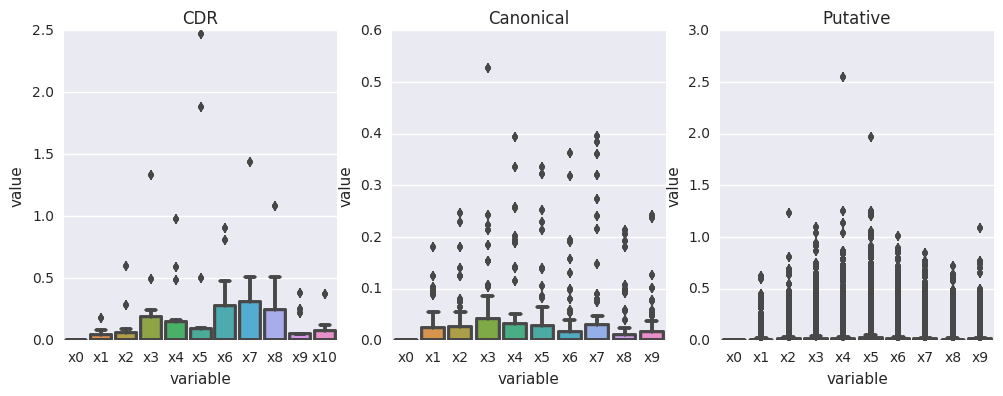

In [105]:
# Apply this code to dataframes from merge_outliers() without merging, see the comment in merge_outliers()
def plot_maxmin2(LEN, df, ax):
    df_new = df.ix[df["len" == LEN, :].groupby("seq").aggregate(lambda x: x.max() - x.min())
    df_melt = pd.melt(pd.DataFrame(df_new))
    for i in range(LEN):
        sns.boxplot(y="value", x="variable", data=df_melt, ax=ax)

fig, ax = plt.subplots(ncols=3)
fig.set_figwidth(12)

plot_maxmin(11, df_cdr, ax[0])
plot_maxmin2(11, df_can2, ax[1])
plot_maxmin2(11, df_put2, ax[2])
ax[0].set_title("CDR")
ax[1].set_title("Canonical")
ax[2].set_title("Putative")

# fig.savefig("plots/maxmin_len11_x_proc.png")
# fig.savefig("plots/maxmin_len11_y_proc.png")

In [198]:
print("CDR\nL all uniq")
for LEN in range(10, 17):
    tmp = df_cdr.ix[df_cdr["len_tcr"] == LEN, "aa_tcr"]
    tmp2 = list(map(lambda x: "".join(x), tmp.reshape((-1, LEN))))
    print(LEN, len(tmp2), len(set(tmp2)))
    
print("\nCanonical\nL all uniq")
for LEN in range(10, 17):
    tmp = df_can.ix[df_can["len_tcr"] == LEN, "aa_kmer"]
    tmp2 = list(map(lambda x: "".join(x), tmp.reshape((-1, LEN))))
    print(LEN, len(tmp2), len(set(tmp2)))
    
print("\nPutative\nL all uniq")
for LEN in range(10, 17):
    tmp = df_put.ix[df_put["len_tcr"] == LEN, "aa_kmer"]
    tmp2 = list(map(lambda x: "".join(x), tmp.reshape((-1, LEN))))
    print(LEN, len(tmp2), len(set(tmp2)))

CDR
L all uniq
10 1 1
11 21 14
12 32 16
13 69 37
14 46 31
15 42 25
16 32 11

Canonical
L all uniq
10 176 61
11 910 185
12 452 113
13 395 121
14 167 55
15 109 42
16 80 15

Putative
L all uniq
10 7219 1648
11 179175 23598
12 146165 17408
13 74735 10167
14 7177 1463
15 7357 1254
16 2697 481


In [213]:
list(map(lambda x: x.shape, df_cdr2.values()))

[(11, 46), (1, 28), (14, 31), (16, 34), (37, 37), (31, 40), (25, 43)]

In [203]:
list(map(lambda x: x.shape, df_can2.values()))

[(15, 48), (61, 30), (185, 33), (113, 36), (121, 39), (55, 42), (42, 45)]

In [202]:
list(map(lambda x: x.shape, df_put2.values()))

[(481, 48),
 (1648, 30),
 (23598, 33),
 (17408, 36),
 (10167, 39),
 (1463, 42),
 (1254, 45)]

In [219]:
for name, df_dict in {"cdr": df_cdr2, "can": df_can2, "put": df_put2}.items():
    for length in df_dict:
        print(name + "." + str(length))
        df_dict[length].to_csv("data/" + name + "." + str(length) + ".csv.gz", compression="gzip")

put.16
put.10
put.11
put.12
put.13
put.14
put.15
can.16
can.10
can.11
can.12
can.13
can.14
can.15
cdr.16
cdr.10
cdr.11
cdr.12
cdr.13
cdr.14
cdr.15


In [228]:
tmp = pd.read_csv("data/cdr.12.csv.gz", index_col=0)

,seq,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,z3,z4,z5,z6,z7,z8,z9,z10,z11,len
0,CAAMEGAQKLVF,0.0,2.577578,3.429473,5.942455,8.282703,8.412450,8.111601,11.498126,10.930834,...,8.832200,10.714615,13.778452,13.446999,11.750219,8.647724,5.932380,3.075652,9.382214e-16,12
1,CAATGSFNKLTF,0.0,2.732398,3.567814,6.047886,7.045919,9.922136,8.794448,8.784202,10.251521,...,8.136480,11.692697,12.622221,14.163365,11.187654,8.007745,5.443584,2.890304,4.248911e-16,12
2,CAGAGSQGNLIF,0.0,2.610093,3.293889,5.249376,8.464672,10.262805,13.258436,11.812081,10.361287,...,9.224959,9.185856,12.057938,11.400117,11.382188,7.974448,5.691690,3.319224,1.358805e-16,12
3,CALSDPVNDMRF,0.0,2.337133,3.356618,5.082181,5.094171,6.515200,10.093313,10.020612,10.100096,...,9.241752,12.832343,16.076854,15.223574,11.369349,8.970333,6.168854,3.351601,1.981780e-16,12
4,CASRRGPYEQYF,0.0,2.428400,3.256069,5.200236,6.298552,5.649245,6.388459,9.178779,9.342211,...,9.270176,11.984024,14.616706,14.777466,12.247342,8.527492,6.111271,3.271795,2.839524e-16,12
5,CASSARSGELFF,0.0,2.643376,3.263885,5.003297,7.790500,8.254369,11.098831,8.750119,9.649930,...,8.819406,10.797549,14.334709,14.115310,12.323335,8.614075,5.947747,3.224025,-1.300053e-16,12
6,CASSQDRDTQYF,0.0,2.585741,3.376306,5.517400,6.721643,8.036570,5.832339,9.181545,10.130949,...,8.881122,12.012202,13.956844,12.391165,11.838378,8.659752,6.021307,3.090070,-3.940243e-16,12
7,CASSQIRETQYF,0.0,2.501215,3.220151,5.282677,5.726637,3.898644,5.958960,8.862028,10.058669,...,8.894991,12.570411,14.215029,14.141076,12.423418,8.761949,6.092064,3.087619,-5.021120e-16,12
8,CASSYQGTEAFF,0.0,2.617380,3.430330,5.626685,6.925261,6.620097,5.494342,8.884683,10.136967,...,9.045204,11.880168,15.256424,14.073553,12.500885,8.876373,6.190056,3.185464,-1.118056e-16,12
9,CAVSGFASALTF,0.0,2.554257,3.489894,5.616122,7.013008,10.432917,10.987777,9.644604,10.100410,...,9.092776,11.261894,12.802685,12.538864,11.723498,8.029653,5.505370,3.166878,-2.492513e-15,12
